### Data preparation
The terrain data was clipped to the extent of the catchment boundary using QGIS, as follows:
- Raster -> Extraction -> Clipper
- Input file -> TerrainData/terrain.tif
- Output file -> TerrainData/terrain_clipped_QGIS.tif
- NoData value -> -9999

In [37]:
import rasterio
import geopandas as gpd
import copy
import numpy as np
import matplotlib.pyplot as plt
import earthpy.spatial as es
from rasterio.plot import plotting_extent
import earthpy.plot as ep
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Read in watercourses data

In [6]:
watercourses = gpd.read_file('../../../FloodModelling/ExtraData/Watercourses/WatercourseLink.shp')

### Plot terrain data for both catchments side by side

In [ ]:
z = np.ma.masked_array(single_cropped_image[0], single_cropped_image[0] < 0.001)

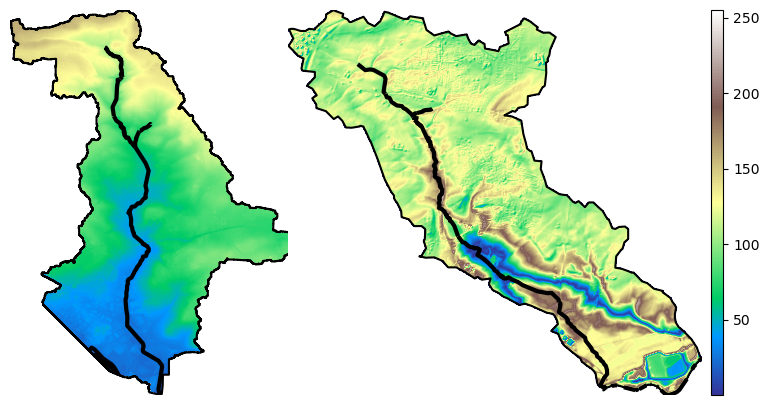

In [47]:
fig, axs = plt.subplots(ncols = 2, figsize=(12,5 ), gridspec_kw={'wspace': -0.4})

def plot_topo(axs,fp, catchment_gdf, cbar=True):
    
    # See map with white below values
    cmap1 = copy.copy(plt.cm.terrain)
    cmap1.set_under('w')
    
    # Needed for cropping
    with rasterio.open(fp) as raster_crs:
        crop_raster_profile = raster_crs.profile
        crop_bound_utm13N = catchment_gdf.to_crs(crop_raster_profile["crs"])    
    
    # Read in data
    with rasterio.open(fp) as src:
        single_cropped_image, single_cropped_meta = es.crop_image(
        src, crop_bound_utm13N)
    
    # Create the extent object
    single_crop_extent = plotting_extent(single_cropped_image[0], single_cropped_meta["transform"])
        
    # Plot the newly cropped image
    crop_bound_utm13N.boundary.plot(ax=axs, color="black", zorder=10)
    ep.plot_bands(single_cropped_image[0], ax=axs, extent=single_crop_extent, cmap = cmap1, 
                      vmin=0.001,vmax=255,cbar=cbar)

    watercourses_clip.plot(ax=axs, linewidth=3, color = 'black')    
    axs.axis('off')

    
# Plot Lin Dyke    
catchment_name  = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)
plot_topo(axs[1], model_directory + 'TerrainData/Terrain_clipped_QGIS.tif', catchment_gdf)  

# Plot Wyke Beck
catchment_name  = 'WykeBeck'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)
catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))
watercourses_clip = gpd.clip(watercourses, catchment_gdf)
plot_topo(axs[0], model_directory + 'TerrainData/Terrain_clipped_QGIS.tif', catchment_gdf, False) 

fig.savefig("../FigsForPaper/Terrain_BothCatchments.jpg",  bbox_inches='tight')

### Find average elevation in each catchment
Old section looking at subcatchment areas.  
Look at GitHub if want to return to this code.

In [32]:
# import pandas as pd
# import rioxarray as rxr

In [30]:
# main_df=pd.DataFrame()
# raster = rxr.open_rasterio(model_directory + 'TerrainData/Terrain_clipped_QGIS.tif', masked=True).squeeze()
# for region_name in ['LinDyke', 'Kippax', 'Garforth', 'Kippax_West', 'Garforth_East', 'Garforth_West', 'South_Catchment', 
#                     'TB_South', 'TB_North']:
#     # Get region boundary
#     region_boundary = boundaries_gpd_dict[region_name]
        
#     # Trim terrain data
#     raster_clipped = raster.rio.clip(region_boundary.geometry.apply(mapping),region_boundary.crs)
    
#     # Add to 
#     df= pd.DataFrame({'mean1':np.nanmean(raster_clipped[1].data), "max1":np.nanmax(raster_clipped[1].data), 
#                       'min1':np.nanmin(raster_clipped[1].data)}, index=[region_name])
#     main_df=pd.concat([df, main_df],axis=0)

In [31]:
# main_df.sort_values(by='mean1', ascending=False)